In [16]:
from sklearn import tree
import pandas as pd
import os

In [17]:
df = pd.read_csv(os.path.join("..", "Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
target = df["Outcome"]
target_names = ["negative", "positive"]

In [19]:
data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6822916666666666

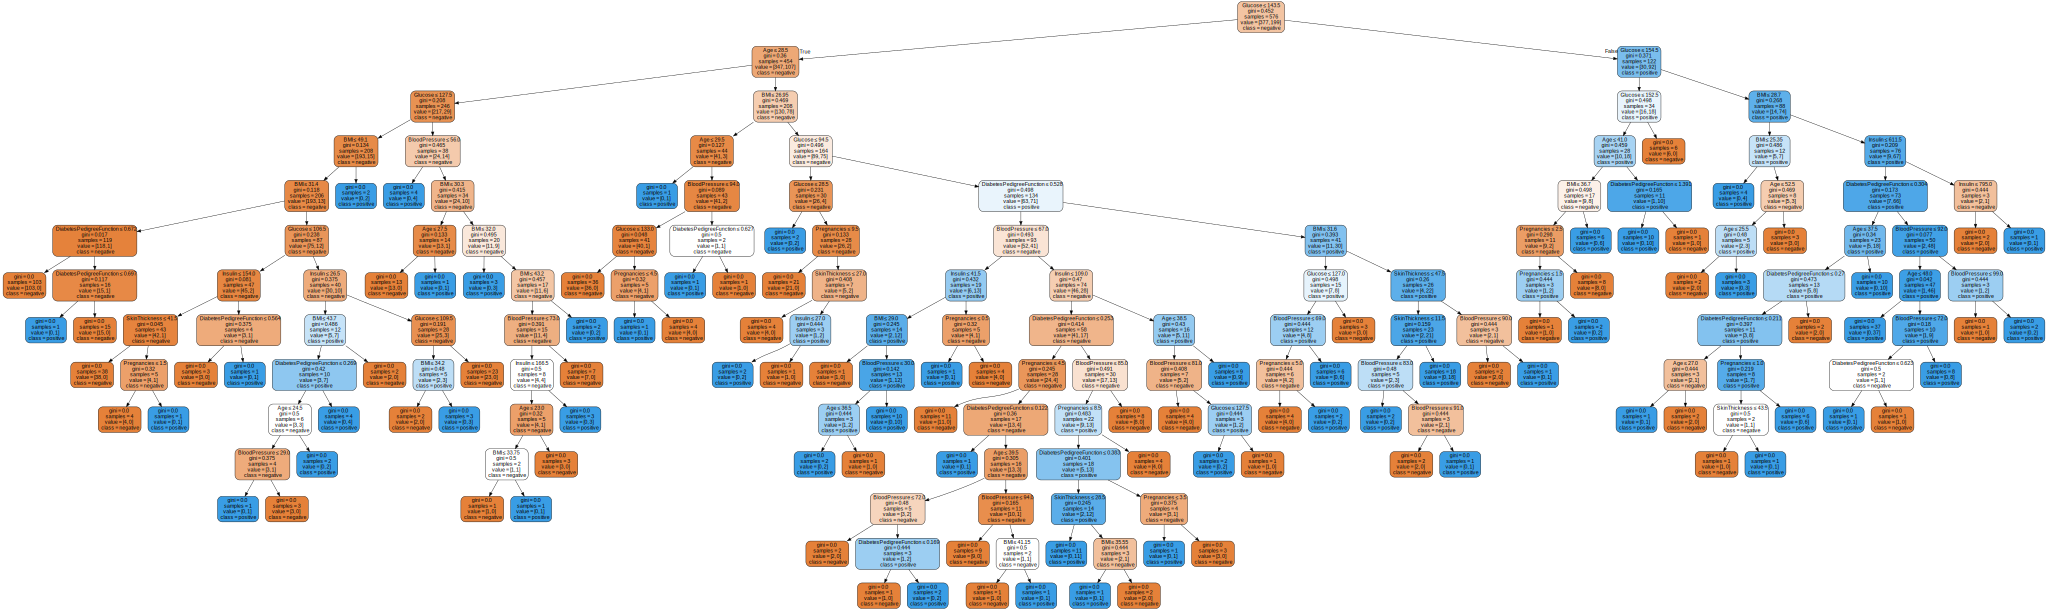

In [24]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names, 
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('pima.png')

graph = graphviz.Source(dot_data)  
graph 

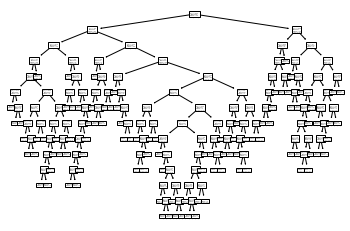

In [27]:
from matplotlib import pyplot as plt
tree.plot_tree(clf)
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.72916666666666663

In [9]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2604038892633122, 'Glucose'),
 (0.16240738779159666, 'BMI'),
 (0.1437077712983523, 'Age'),
 (0.12126276641273467, 'DiabetesPedigreeFunction'),
 (0.088871399128041817, 'BloodPressure'),
 (0.079222898914976206, 'Pregnancies'),
 (0.07440650942444979, 'Insulin'),
 (0.069717377766536262, 'SkinThickness')]